# Tuning Quadratisation penalty

In the current formulation, higher order terms only occur in the max-norm constraints. To test for appropriate $M_{kl}$, we consider the max-norm constraints:
\begin{align*}
    \sum_{n=0}^{2L}\left(|y_n\left(\mathbf{u}(\mathbf{q})\right)|^2 - \mu + k\right)^2
\end{align*}
for some random vector $\mathbf{u}$. Then, compare $z_{kl}$ with $q_k$ and $q_l$. Start at 'low' $M_{kl}$, anneal, If



| $q_k$ | $q_l$ | $z_{kl}$ |
| :-: | :-: | :-: |
| 0 | 0 | 0|
| 0 | 1 | 0|
| 1 | 0 | 0|
| 1 | 1 | 1|

then keep $M_{kl}$, else increase $M_{kl}$.

<br>

### Random vector

means giving random domains to Create_float_vec()

<br>

In [29]:
import numpy as np
import pyqubo as pq
import sympy as sp
from PyQubo_formulation import *
from Utilities import *

import neal
import itertools

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors

In [30]:
# Let all the domains be around [-1,1]

root = np.array([-2,2], dtype='float')

ulen = 6

eps1 = np.around(np.random.uniform(-1, 1, ulen), decimals=1)
eps2 = np.around(np.random.uniform(-1, 1, ulen), decimals=1)

domains = np.tile(root, (ulen,1))

domains[:,0] = domains[:,0]+eps1
domains[:,1] = domains[:,1]+eps2
print('domains: ','\n', domains)

domains:  
 [[-2.3  1.3]
 [-2.4  1.5]
 [-2.1  2. ]
 [-1.7  1.4]
 [-1.3  3. ]
 [-1.7  2.2]]


In [40]:
# create the vector

nq_u = 4
print('num bin vars for u: ', nq_u*ulen)
u = Create_float_vec(ulen, nq_u, domains)
u[0]

num bin vars for u:  24


((1.800000 * (((Binary('q[0]') + (0.500000 * Binary('q[1]'))) + (0.250000 * Binary('q[2]'))) + (0.125000 * Binary('q[3]')))) + -2.300000)

In [41]:
# these are arbitrary for this purpose
nq_mu = 4
muparams = np.array([nq_mu,[-3,3]], dtype='object')

In [42]:
# create the max norm problem

maxnorm = Max_Norm_LP(u, 1, muparams, muparams)

test


In [44]:
M = 1
model = maxnorm.compile(strength=M)

model_qubo = model.to_qubo(index_label=True)
modelmat = Dict_to_Mat(model_qubo[0])

np.trace(modelmat)

286.3537243972779

## Simulated Annealing

Now, we can test the quadtratisation success in simulated annealing 

In [45]:
sampler = neal.SimulatedAnnealingSampler()

sampler.parameters

{'beta_range': [],
 'num_reads': [],
 'num_sweeps': [],
 'beta_schedule_type': ['beta_schedule_options'],
 'seed': [],
 'interrupt_function': [],
 'initial_states': [],
 'initial_states_generator': []}

In [46]:
M = 1
model = maxnorm.compile(strength=M)

model_vars = model.variables

model_qubo = model.to_qubo()
model_qubo

({('kq[0]', 'q[4] * q[7]'): 5.703749999999999,
  ('kq[2]', 'muq[1]'): -13.5,
  ('muq[1]', 'q[23]'): 2.3080078125,
  ('muq[2]', 'q[16] * q[17]'): -6.93375,
  ('kq[1]', 'q[0]'): -15.120000000000001,
  ('kq[0]', 'q[12] * q[13]'): 14.414999999999996,
  ('kq[3]', 'q[14]'): -0.8755078125,
  ('kq[0]', 'q[13] * q[15]'): 1.8018749999999994,
  ('kq[3]', 'q[6] * q[7]'): 0.17824218749999998,
  ('q[4] * q[5]', 'q[5]'): -2.0,
  ('kq[1]', 'q[5] * q[7]'): 1.4259374999999999,
  ('kq[1]', 'q[6]'): -6.30703125,
  ('kq[1]', 'q[14]'): -3.50203125,
  ('q[12] * q[13]', 'q[12] * q[13]'): 10.772087499999998,
  ('kq[3]', 'muq[0]'): -13.5,
  ('kq[0]', 'kq[3]'): 13.5,
  ('muq[1]', 'q[4] * q[6]'): -5.703749999999999,
  ('kq[0]', 'q[5] * q[7]'): 2.8518749999999997,
  ('muq[3]', 'q[8] * q[11]'): -0.7879687499999999,
  ('kq[1]', 'q[17]'): -4.918125,
  ('muq[2]', 'q[21] * q[22]'): -1.4259375000000003,
  ('kq[1]', 'q[4] * q[7]'): 2.8518749999999997,
  ('kq[2]', 'muq[0]'): -27.0,
  ('kq[2]', 'q[0] * q[2]'): 2.4299999999

In [47]:
sampleset = sampler.sample_qubo(model_qubo[0], num_reads=100)

In [50]:
unique_vars = model_vars[:(nq_u*ulen+2*nq_mu)]
print(model_vars,'\n')
print(unique_vars, '\n')
print(sampleset.variables)

['muq[0]', 'muq[1]', 'muq[2]', 'muq[3]', 'q[0]', 'q[1]', 'q[2]', 'q[3]', 'kq[0]', 'kq[1]', 'kq[2]', 'kq[3]', 'q[4]', 'q[5]', 'q[6]', 'q[7]', 'q[8]', 'q[9]', 'q[10]', 'q[11]', 'q[12]', 'q[13]', 'q[14]', 'q[15]', 'q[16]', 'q[17]', 'q[18]', 'q[19]', 'q[20]', 'q[21]', 'q[22]', 'q[23]', 'q[0] * q[1]', 'q[2] * q[3]', 'q[4] * q[5]', 'q[6] * q[7]', 'q[8] * q[9]', 'q[10] * q[11]', 'q[12] * q[13]', 'q[14] * q[15]', 'q[16] * q[17]', 'q[18] * q[19]', 'q[20] * q[21]', 'q[22] * q[23]', 'q[0] * q[2]', 'q[0] * q[3]', 'q[1] * q[2]', 'q[1] * q[3]', 'q[4] * q[6]', 'q[4] * q[7]', 'q[5] * q[6]', 'q[5] * q[7]', 'q[8] * q[10]', 'q[8] * q[11]', 'q[9] * q[10]', 'q[9] * q[11]', 'q[12] * q[14]', 'q[12] * q[15]', 'q[13] * q[14]', 'q[13] * q[15]', 'q[16] * q[18]', 'q[16] * q[19]', 'q[17] * q[18]', 'q[17] * q[19]', 'q[20] * q[22]', 'q[20] * q[23]', 'q[21] * q[22]', 'q[21] * q[23]'] 

['muq[0]', 'muq[1]', 'muq[2]', 'muq[3]', 'q[0]', 'q[1]', 'q[2]', 'q[3]', 'kq[0]', 'kq[1]', 'kq[2]', 'kq[3]', 'q[4]', 'q[5]', 'q[6]', 

In [51]:
samples = sampleset.samples()
energies = sampleset.record['energy']

In [69]:
list(samples[0].keys())

['kq[0]',
 'kq[1]',
 'kq[2]',
 'kq[3]',
 'muq[0]',
 'muq[1]',
 'muq[2]',
 'muq[3]',
 'q[0]',
 'q[0] * q[1]',
 'q[0] * q[2]',
 'q[0] * q[3]',
 'q[10]',
 'q[10] * q[11]',
 'q[11]',
 'q[12]',
 'q[12] * q[13]',
 'q[12] * q[14]',
 'q[12] * q[15]',
 'q[13]',
 'q[13] * q[14]',
 'q[13] * q[15]',
 'q[14]',
 'q[14] * q[15]',
 'q[15]',
 'q[16]',
 'q[16] * q[17]',
 'q[16] * q[18]',
 'q[16] * q[19]',
 'q[17]',
 'q[17] * q[18]',
 'q[17] * q[19]',
 'q[18]',
 'q[18] * q[19]',
 'q[19]',
 'q[1]',
 'q[1] * q[2]',
 'q[1] * q[3]',
 'q[20]',
 'q[20] * q[21]',
 'q[20] * q[22]',
 'q[20] * q[23]',
 'q[21]',
 'q[21] * q[22]',
 'q[21] * q[23]',
 'q[22]',
 'q[22] * q[23]',
 'q[23]',
 'q[2]',
 'q[2] * q[3]',
 'q[3]',
 'q[4]',
 'q[4] * q[5]',
 'q[4] * q[6]',
 'q[4] * q[7]',
 'q[5]',
 'q[5] * q[6]',
 'q[5] * q[7]',
 'q[6]',
 'q[6] * q[7]',
 'q[7]',
 'q[8]',
 'q[8] * q[10]',
 'q[8] * q[11]',
 'q[8] * q[9]',
 'q[9]',
 'q[9] * q[10]',
 'q[9] * q[11]']

In [60]:
try:
    res = samples[0][unique_vars[0]+' * '+unique_vars[1]]
except ValueError:
    res = 'ded'
print(res)

ded


In [80]:

def quad_error(sample, variables):
    """
    Given a result sample and list of variables,
    check if quadratisation was respected. Checks if
    qk*ql == zkl.
    """
    
    all_combos = list(itertools.combinations(variables, 2))
  
    all_keys = list(sample.keys())
    
    res = []
    for pair in all_combos:
        quad = pair[0]+' * '+pair[1]
        try:
            res.append(sample[pair[0]]*sample[pair[1]] == sample[quad])
        except:
            all_combos.remove(pair)
    
    res = np.array(res)
    res = res.astype(int)
    
    error = np.count_nonzero(res==0) / len(res)
    
    return error

quad_error(samples[0], unique_vars)

0.8611111111111112

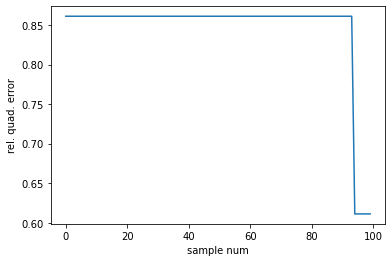

In [81]:
errors = np.zeros(len(samples))

for i in range(len(samples)):
    errors[i] = quad_error(samples[i], unique_vars)

plt.plot(errors)
plt.xlabel('sample num')
plt.ylabel('rel. quad. error')
plt.show()

In [124]:
# Varying M

M = np.linspace(10, 60, 20)

model_qubo = np.zeros(len(M), dtype='object')

for i in  range(len(M)):
    model = maxnorm.compile(strength=M[i])

    model_qubo[i] = model.to_qubo()

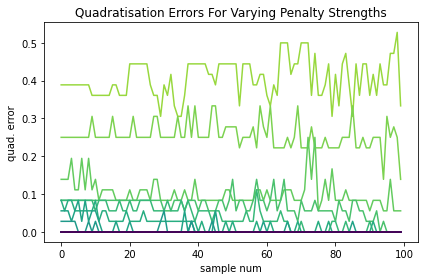

In [126]:


cNorm = colors.Normalize(vmin=1, vmax=M[-1])
cm = plt.get_cmap('viridis_r')
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

median = np.zeros(len(M))
mean = np.zeros(len(M))

energies = []
samples = []

for i in range(len(M)):
    sampleset = sampler.sample_qubo(model_qubo[i][0], num_reads=100)

    samples = sampleset.samples()
    energies = sampleset.record['energy']
    
    min_energy = np.min(energies)

    errors = np.zeros(len(samples))
    for j in range(len(samples)):
#         if np.abs(min_energy - energies[j]) <= min_energy/10: 
        errors[j] = quad_error(samples[j], unique_vars)
    
    plt.plot(errors, color=scalarMap.to_rgba(M[i]))
    
    median[i] = np.median(errors)
    mean[i] = np.mean(errors)
    
plt.xlabel('sample num')
plt.ylabel('quad. error')
plt.title('Quadratisation Errors For Varying Penalty Strengths')
plt.tight_layout()
plt.savefig('trial_quad_err.png', dpi=300)
plt.show()


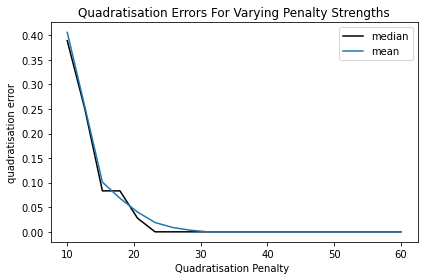

In [127]:
plt.plot(M, median, c='k', label='median')
plt.plot(M, mean, label='mean')
plt.xlabel('Quadratisation Penalty ')
plt.ylabel('quadratisation error')
plt.title('Quadratisation Errors For Varying Penalty Strengths')
plt.legend()
plt.tight_layout()
plt.savefig('quad_errs_medians_vs_M.png', dpi=300)
plt.show()



In [147]:
# Varying M

M = np.linspace(1, 30, 40)

model_qubo = np.zeros(len(M), dtype='object')

for i in  range(len(M)):
    model = maxnorm.compile(strength=M[i])

    model_qubo[i] = model.to_qubo()

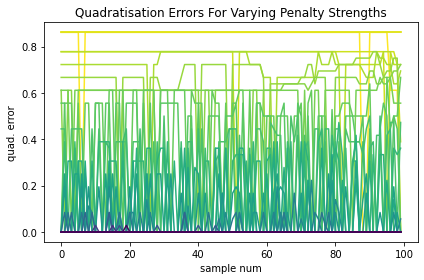

In [148]:


cNorm = colors.Normalize(vmin=1, vmax=M[-1])
cm = plt.get_cmap('viridis_r')
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

median = np.zeros(len(M))
mean = np.zeros(len(M))

energies = []
samples = []

for i in range(len(M)):
    sampleset = sampler.sample_qubo(model_qubo[i][0], num_reads=100)

    samples = sampleset.samples()
    energies = sampleset.record['energy']
    
    min_energy = np.min(energies)
    
    errors = np.zeros(len(samples))
    for j in range(len(samples)):
        if np.abs(min_energy - energies[j]) <= np.abs(min_energy)/100: 
            errors[j] = quad_error(samples[j], unique_vars)
    
    plt.plot(errors, color=scalarMap.to_rgba(M[i]))
    
    median[i] = np.median(errors)
    mean[i] = np.mean(errors)
    
plt.xlabel('sample num')
plt.ylabel('quad. error')
plt.title('Quadratisation Errors For Varying Penalty Strengths')
plt.tight_layout()
# plt.savefig('trial_quad_err.png', dpi=300)
plt.show()


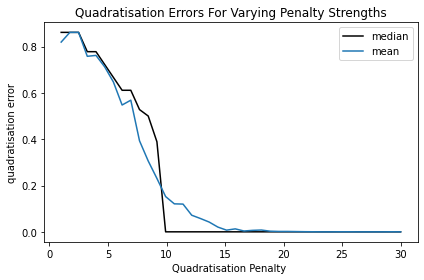

In [149]:
plt.plot(M, median, c='k', label='median')
plt.plot(M, mean, label='mean')
plt.xlabel('Quadratisation Penalty ')
plt.ylabel('quadratisation error')
plt.title('Quadratisation Errors For Varying Penalty Strengths')
plt.legend()
plt.tight_layout()
plt.savefig('quad_errs_medians_vs_M.png', dpi=300)
plt.show()

<br>

### Effect of Domain Magnitudes

So far, the random vector $\mathbf{u}$ was always modelled to be within the domain $[-2,2]$.

Larger domains introduce larger floats and thus biases and couplings between variables might be harder to overcome.

<br>

Test with a few differently sized domains:

<br>

In [150]:
root = np.linspace(0.5, 5, 10)

roots = np.array([[-root[i],root[i]] for i in range(len(root))])

print(roots)

[[-0.5  0.5]
 [-1.   1. ]
 [-1.5  1.5]
 [-2.   2. ]
 [-2.5  2.5]
 [-3.   3. ]
 [-3.5  3.5]
 [-4.   4. ]
 [-4.5  4.5]
 [-5.   5. ]]


test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test


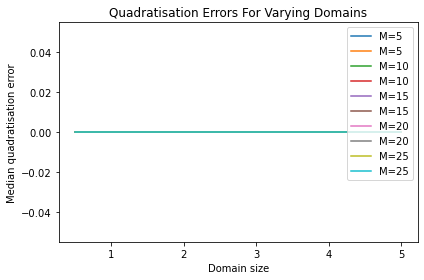

In [156]:
nq_u = 4
ulen = 6

eps1 = np.around(np.random.uniform(-0.5, 0.5, ulen), decimals=2)
eps2 = np.around(np.random.uniform(-0.5, 0.5, ulen), decimals=2)

M = [5,10,15,20,25]
for m in M:
    median = np.zeros(len(roots))
    mean = np.zeros(len(roots))
    for i in range(len(roots)):

        domains = np.tile(roots[i], (ulen,1))

        domains[:,0] = domains[:,0]+eps1
        domains[:,1] = domains[:,1]+eps2

        u2 = Create_float_vec(ulen, nq_u, domains)

        maxnorm = Max_Norm_LP(u2, 1, muparams, muparams)

        model = maxnorm.compile(strength=m)

        model_vars = model.variables
        unique_vars = model_vars[:(nq_u*ulen+2*nq_mu)]
        
        model_qubo = model.to_qubo()

        sampleset = sampler.sample_qubo(model_qubo[0], num_reads=1000)

        samples = sampleset.samples()
        energies = sampleset.record['energy']

        errors = np.zeros(len(samples))
        for j in range(len(samples)):
            if np.abs(min_energy - energies[j]) <= np.abs(min_energy)/100:
                errors[j] = quad_error(samples[j], unique_vars)

        median[i] = np.median(errors)
        mean[i] = np.mean(errors)
    
    plt.plot(np.abs(roots), median, label='M={}'.format(m))
# plt.plot(mean, label='mean')
plt.xlabel('Domain size')
plt.ylabel('Median quadratisation error')
plt.title('Quadratisation Errors For Varying Domains')
plt.legend()
plt.tight_layout()
plt.savefig('quad_errs_median_vs_domain_varM.png', dpi=300)
plt.show()

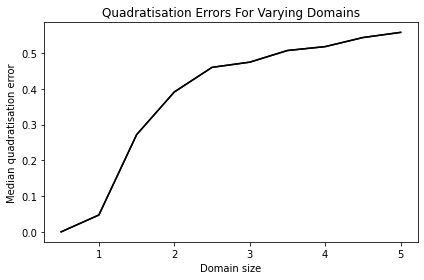